# two_point_correlation_bf

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()
np.random.seed(10)

## Genearate image for testing

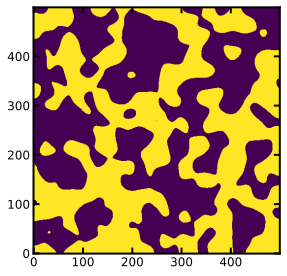

In [2]:
skel = ps.generators.blobs(shape=[500, 500])
im = ps.filters.prune_branches(skel)
fig, ax = plt.subplots()
ax.imshow(im, origin="lower");

Output is a tuple with elements probability and distance

## Apply metric function

### spacing

In [3]:
x = ps.metrics.two_point_correlation_bf(im=im)
xx = ps.metrics.two_point_correlation_bf(im=im, spacing=5)

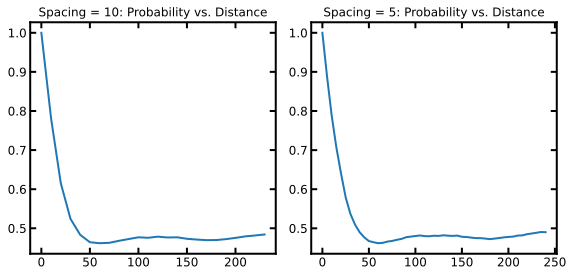

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].plot(x.distance, x.probability)
ax[1].plot(xx.distance, xx.probability)
ax[0].set_title("Spacing = 10: Probability vs. Distance")
ax[1].set_title("Spacing = 5: Probability vs. Distance");